### Glass Identification
##### Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
##### Attribute Information-
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

* 1- building_windows_float_processed
* 2- building_windows_non_float_processed
* 3- vehicle_windows_float_processed
* 4- vehicle_windows_non_float_processed (none in this database)
* 5- containers
* 6- tableware
* 7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

##### Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


--------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The above data set shows data of types of glasses where we need to locate, prepare and summarize the data to make it interpretable for important visualizations.

### Exploring Dataset
1. Shape of dataset
2. Count of Null values
3. Uniques values
4. Statisitics of dataset

In [3]:
df.shape

(214, 11)

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Above table of content shows that the data across all attributes are different, we need to normalize the data first.

In [6]:
#naming the data with the meaningful names

names = ['Id','Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_type']
df.columns = names
df.head()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
#removing needless column
df = df.drop('Id',1)

In [8]:
df.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
#checking outliers through z-score

from scipy import stats

z = abs(stats.zscore(df))

#np.where(z > 3)

df = df[(z < 3).all(axis=1)]

In [10]:
#separating features and labels
feature = ['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Glass_type']

x = df[feature]

y = df[label]

In [11]:
x.shape

(194, 9)

In [12]:
type(x)

pandas.core.frame.DataFrame

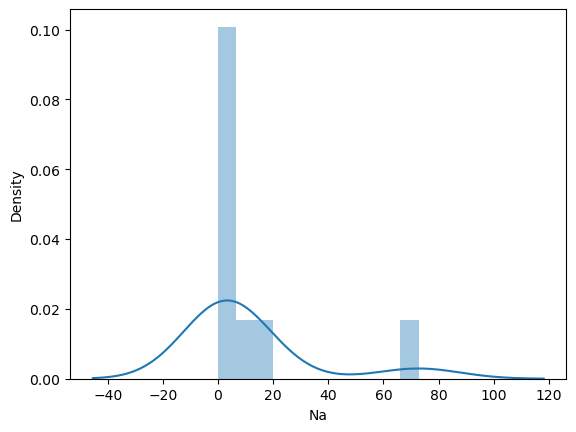

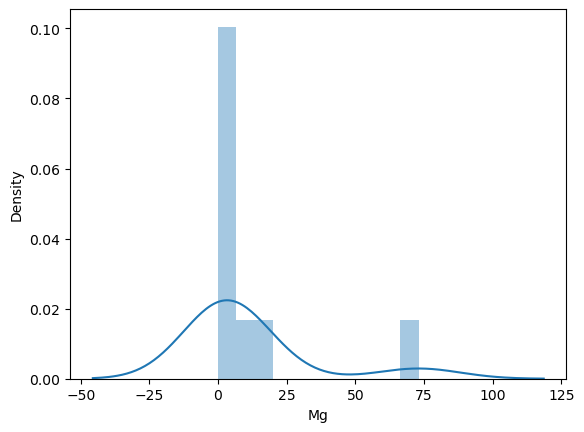

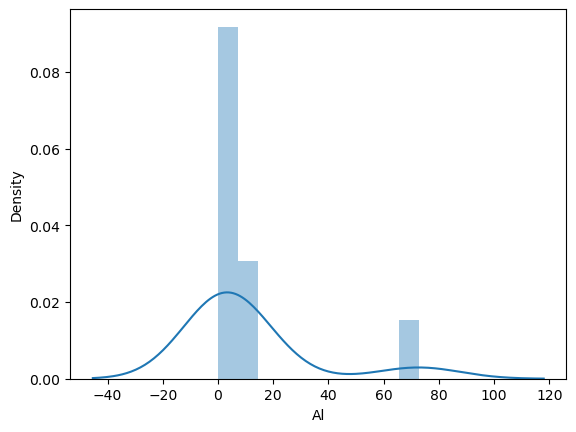

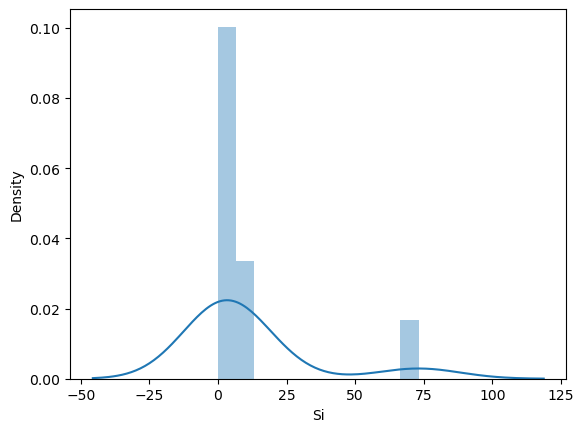

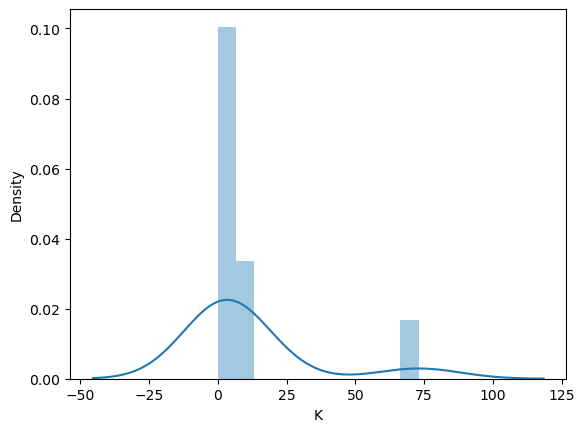

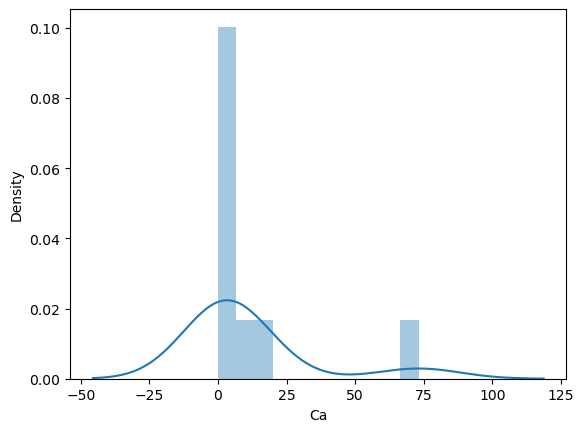

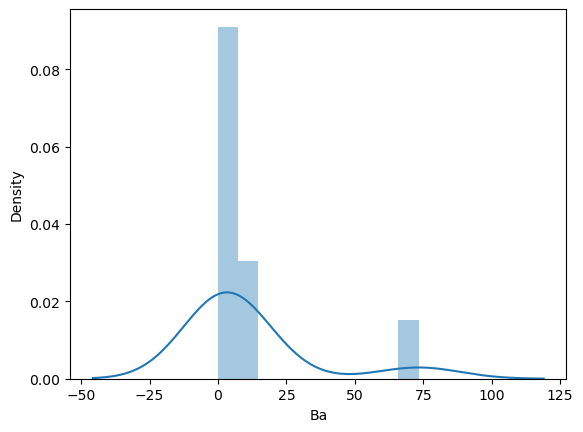

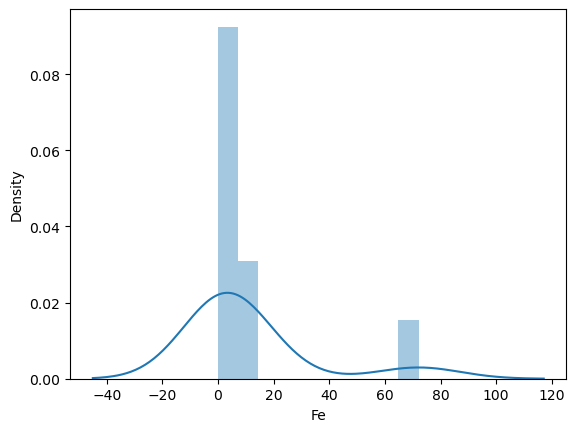

In [13]:
#data visualization

x2 = x.values

for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(feature[i])
        plt.show()

The plots above shows that the dataset is skewed either on the positive side or negative side which shows that data is not normalized

<Figure size 800x800 with 0 Axes>

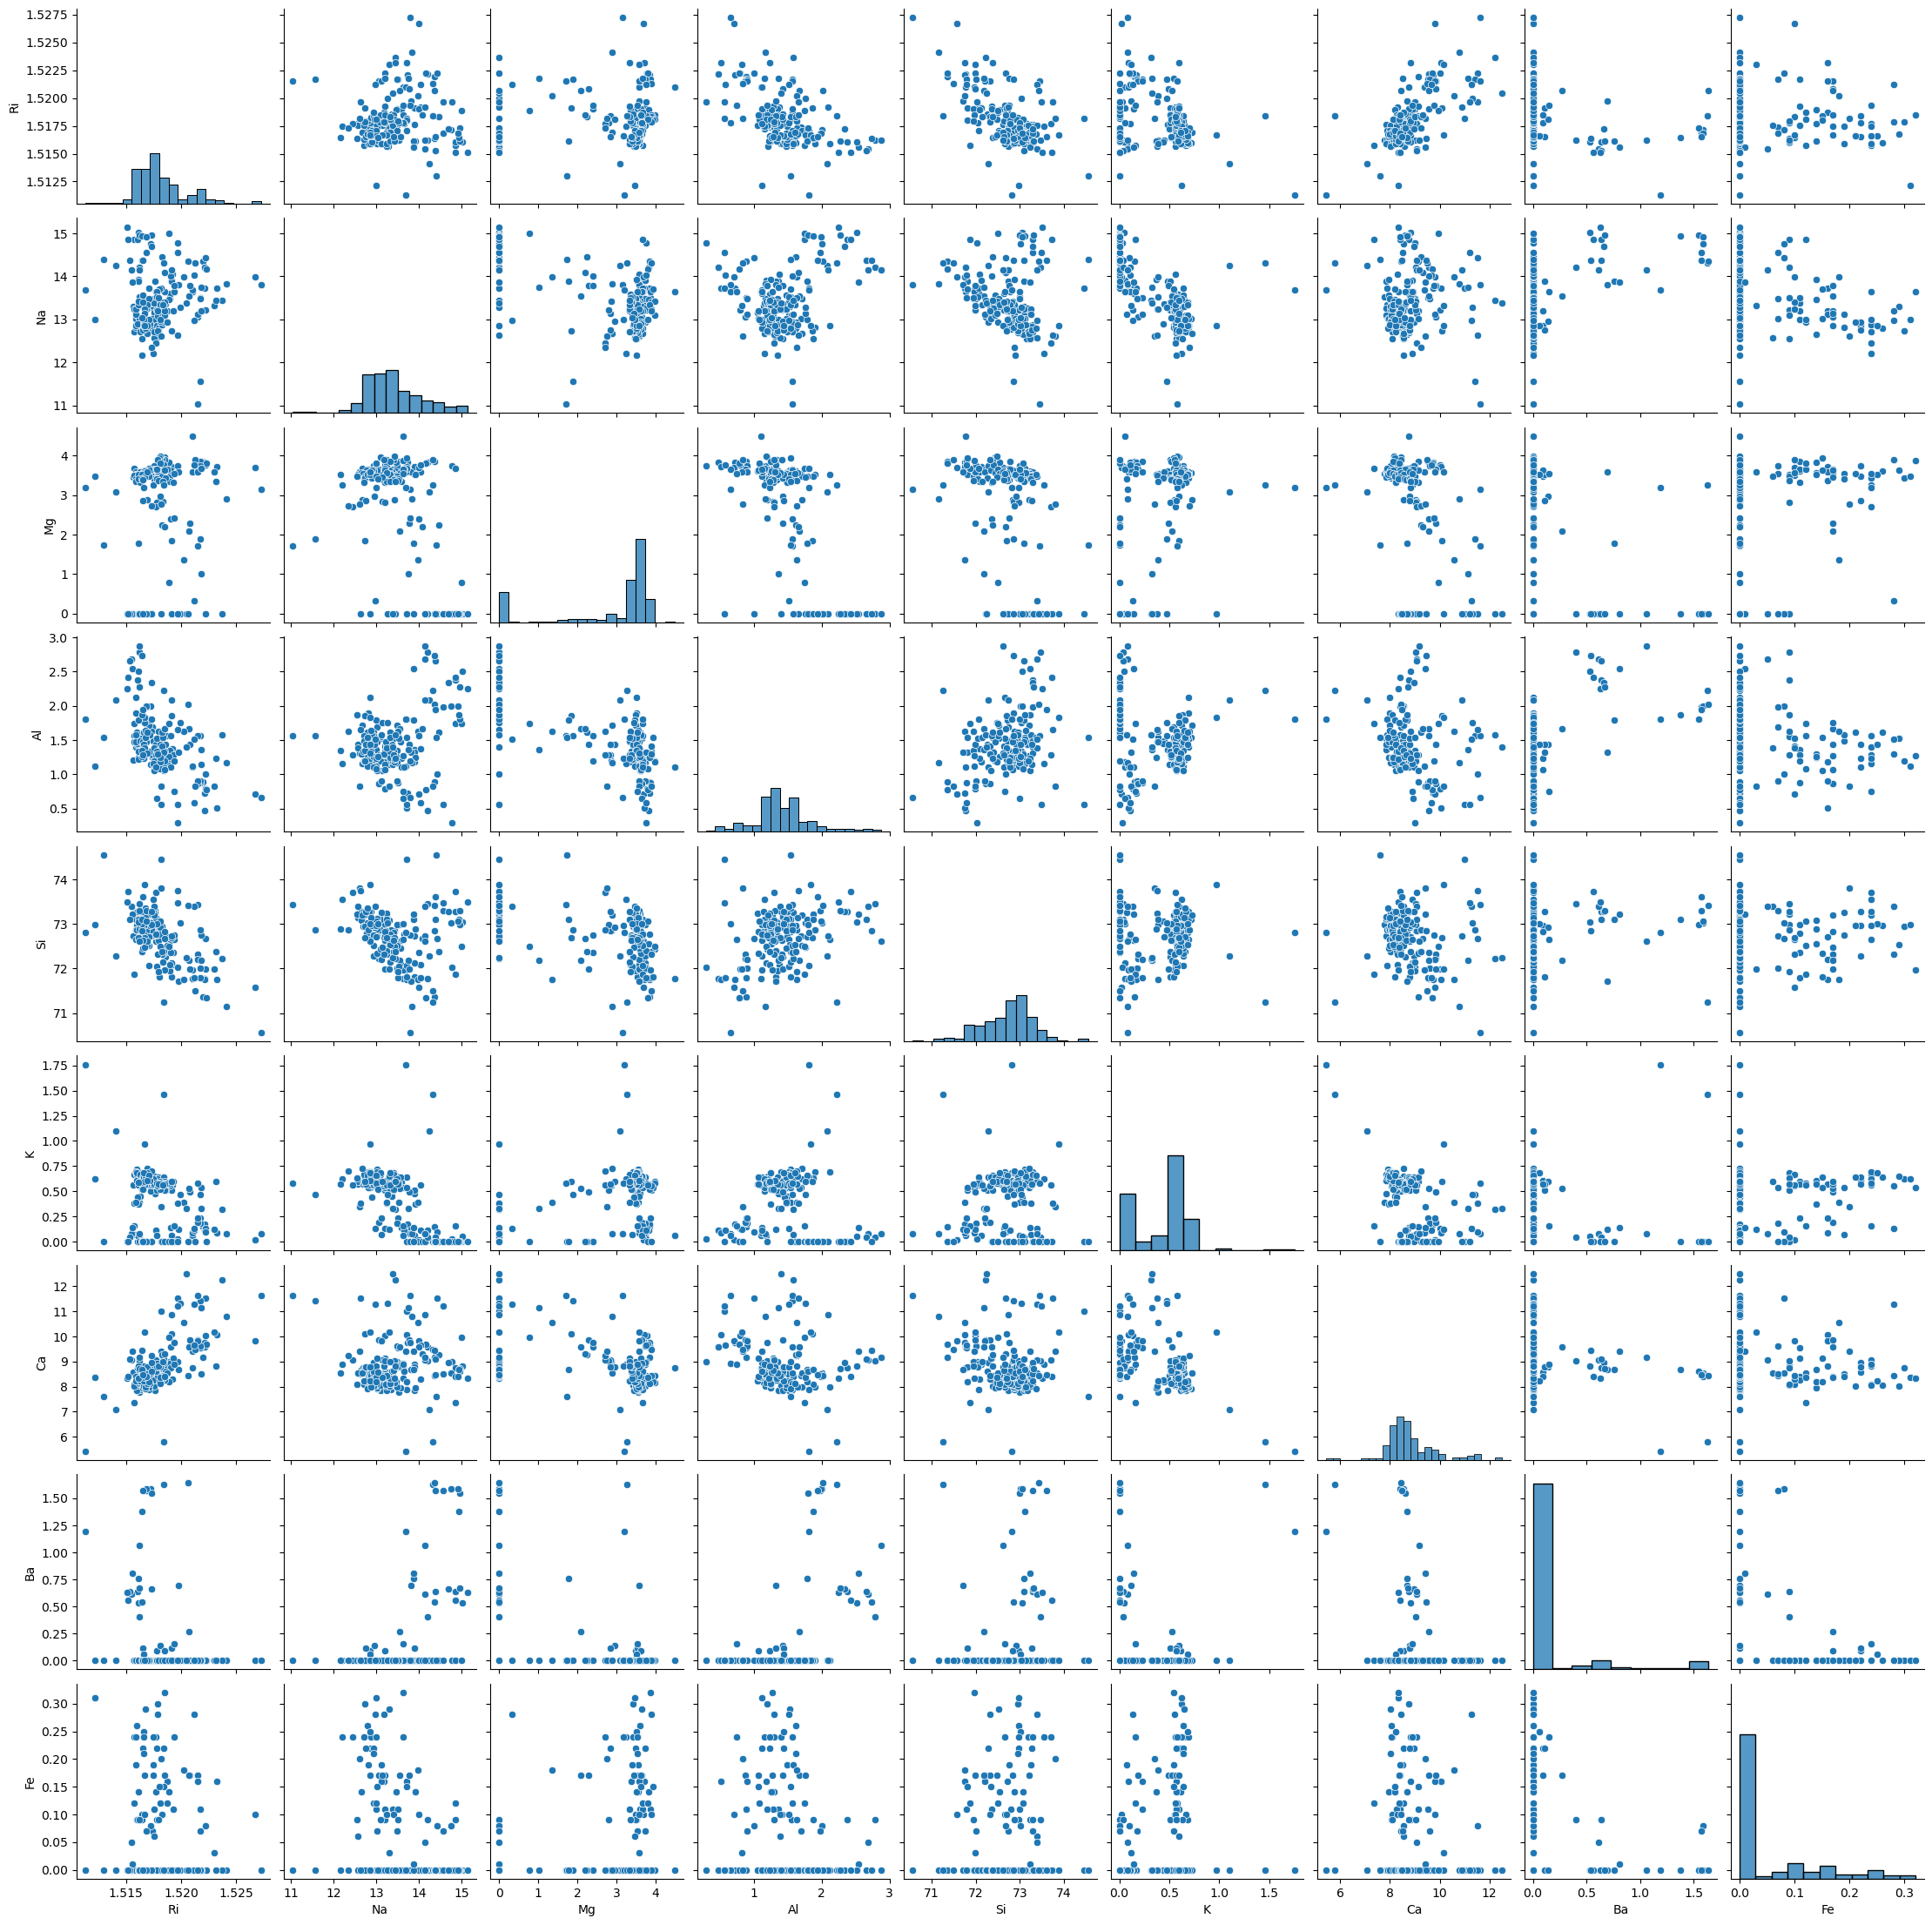

In [14]:
x2 = pd.DataFrame(x)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

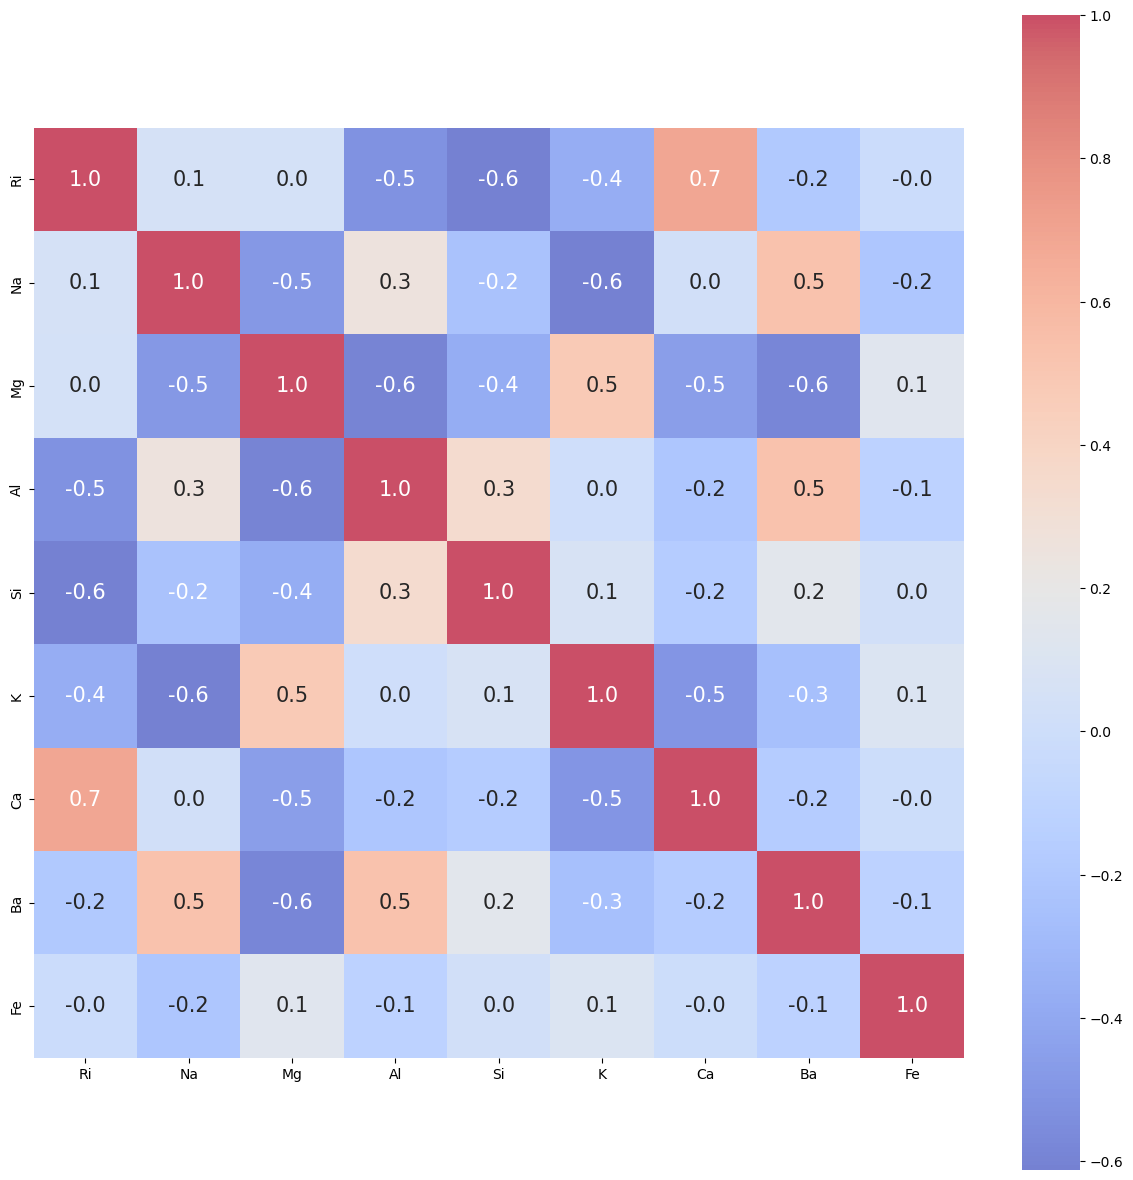

In [15]:
coreleation= x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=feature,yticklabels=feature,alpha=0.7,cmap= 'coolwarm')
plt.show()

In the above heatmap figure we can determine different conclusions:
* Ri and Ba have intermediate correlation between each other.
* Ri and Ca are strongly correlated to each other.

In [16]:
#Scalling the data  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
x.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [18]:
y.head()

,Glass_type
0,1
1,1
2,1
3,1
4,1


In [19]:
from sklearn import preprocessing
x=preprocessing.scale(x)

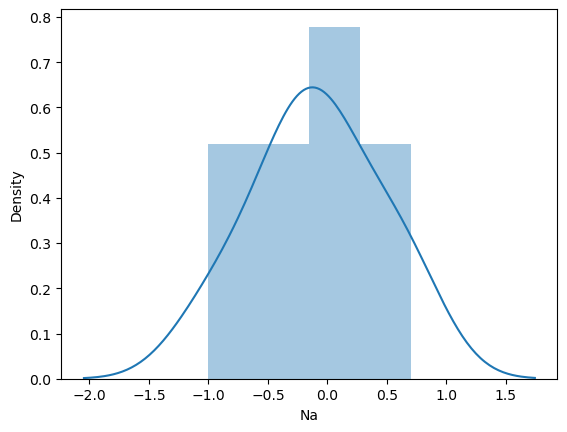

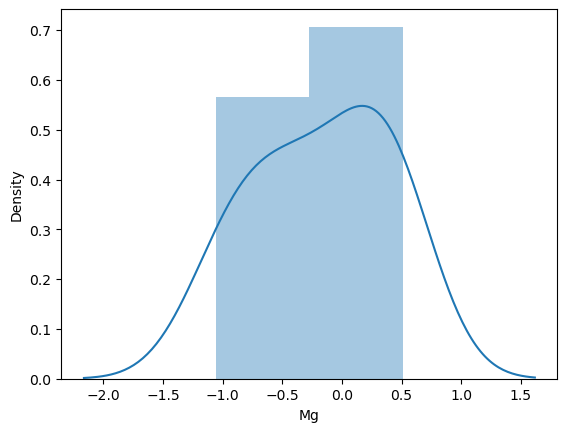

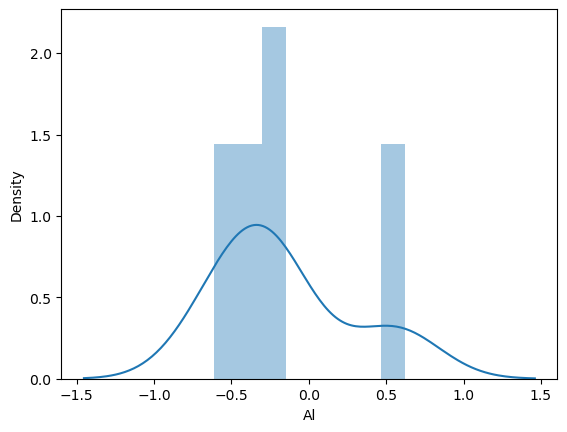

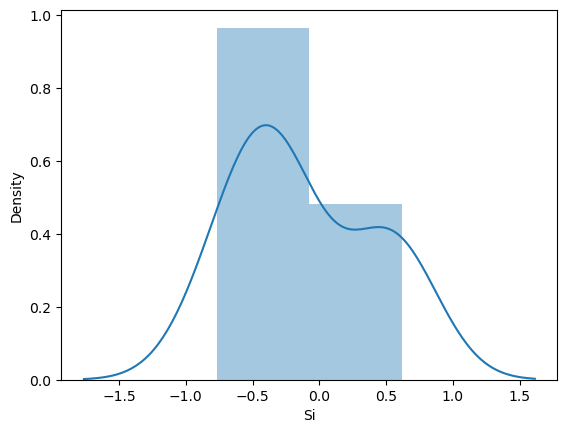

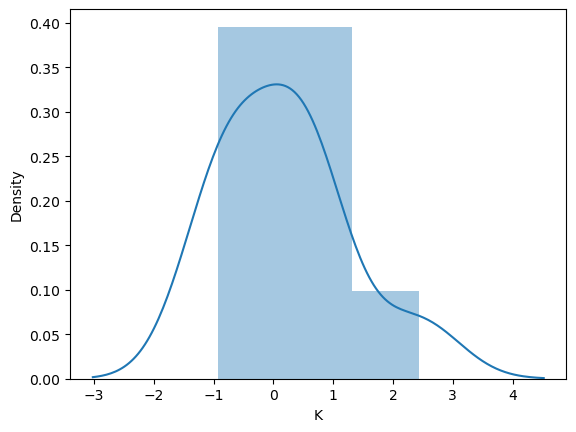

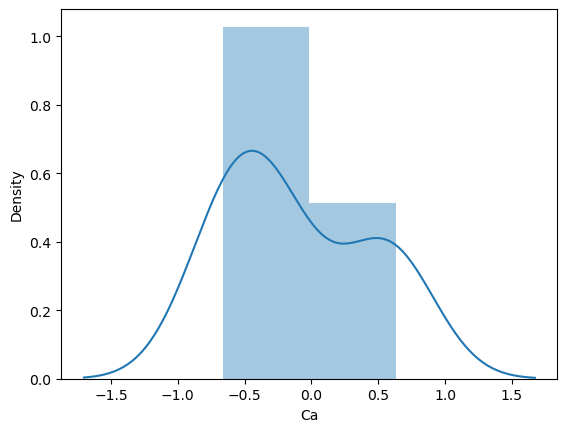

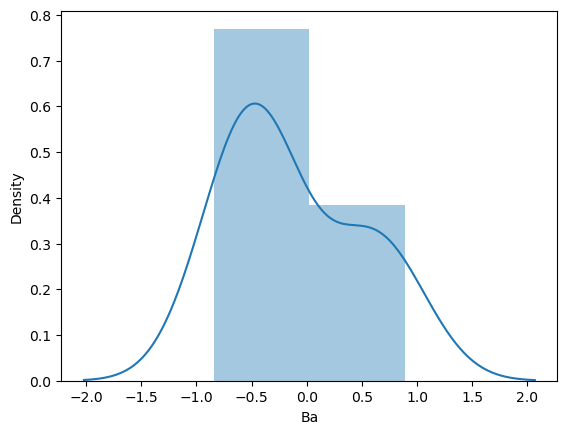

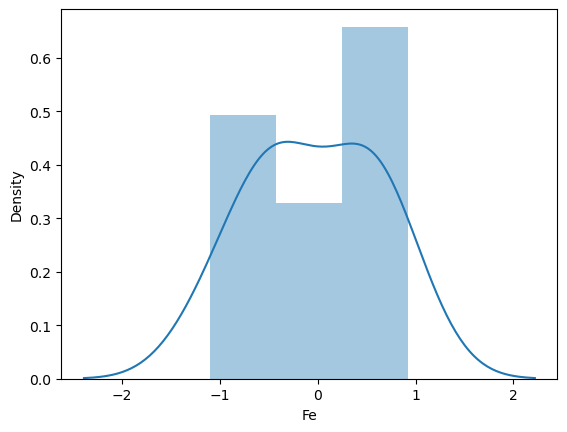

In [20]:
#data visualization
x2 = x

for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(feature[i])
        plt.show()

The plots above shows that skewness is reduced after preprocessing and data is more normalized now.

In [24]:
#splitting and testing the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0,stratify=y)

In [25]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [26]:
print('Shape of x_train = ' + str(x_train.shape))
print('Shape of x_test = ' + str(x_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of x_train = (145, 9)
Shape of x_test = (49, 9)
Shape of y_train = (145,)
Shape of y_test = (49,)


### Applying different machine learning models

In [37]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

Scores = []
Range = [10,20,30,50,70,80,100,120]

for i in range(1):
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
    forest.fit(x_train, y_train)
    score = forest.score(x_test,y_test)

print(forest.score(x_train,y_train))
print(score)

0.9724137931034482
0.7755102040816326


In [29]:
#KNN

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score = knn.score(x_test,y_test)
    Scores.append(score)

print(knn.score(x_train,y_train))
print(Scores)

0.6896551724137931
[0.7142857142857143, 0.6530612244897959, 0.7346938775510204, 0.7142857142857143, 0.673469387755102, 0.6530612244897959, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082]


In [30]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(x_train, y_train)
    score = tree.score(x_test,y_test)
    Scores.append(score)

print(tree.score(x_train,y_train))
print(Scores)

1.0
[0.5510204081632653]


In [31]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(x_train, y_train)
    score = logistic.score(x_test,y_test)
    Scores.append(score)
    
print(logistic.score(x_train,y_train))
print(Scores)

0.7517241379310344
[0.6938775510204082]


In [32]:
#SVC Classifier (Non-linear kernal)

from sklearn.svm import SVC

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(x_train, y_train)
    score = svc.score(x_test,y_test)
    Scores.append(score)

print(svc.score(x_train,y_train))
print(Scores)

0.7517241379310344
[0.7551020408163265]


In [33]:
#SVC Classifier (Linear kernal)
from sklearn.svm import LinearSVC

Scores = []

for i in range(1):
    svc = LinearSVC(random_state=0)
    svc.fit(x_train, y_train)
    score = svc.score(x_test,y_test)
    Scores.append(score)

print(svc.score(x_train,y_train))
print(Scores)

0.7517241379310344
[0.6938775510204082]


In [34]:
#Neural network

from sklearn.neural_network import MLPClassifier

Scores = []

for i in range(1):
    NN = MLPClassifier(random_state=0)
    NN.fit(x_train, y_train)
    score = NN.score(x_test,y_test)
    Scores.append(score)

print(NN.score(x_train,y_train))
print(Scores)

0.7931034482758621
[0.7551020408163265]


In [36]:
#Gradient Decent Tree boosting

from sklearn.ensemble import GradientBoostingClassifier

gd = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gd.fit(x_train, y_train)
score = gd.score(x_test,y_test)

print(gd.score(x_train,y_train))
print(score)

0.9724137931034482
0.6326530612244898


Out of all the above models, Random Forest Classifier is giving the best results with:
    
* Training Accuracy - 0.9724137931034482
* Testing Accuracy - 0.7755102040816326   

However, it is overfitting. We will consider the 2nd-best result to move forward, ie., Non-linear kernal with:

* Training Accuracy - 0.7517241379310344
* Testing Accuracy - 0.7551020408163265
